In [2]:
# 安装必要的库
!pip install torch onnx

# 挂载Google Drive
from google.colab import drive
drive.mount('/content/drive')

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
import cv2
import numpy as np

# 加载 ONNX 模型
net = cv2.dnn.readNetFromONNX('/content/drive/MyDrive/yolo-ocr/plate_detect.onnx')

# 打印模型的层信息
layer_names = net.getLayerNames()
print("Layer Names:", layer_names)

# 假设输入层是第一个层，您可以根据模型结构来调整
input_layer_name = layer_names[0]
print("Input Layer Name:", input_layer_name)

# 读取并预处理图像（调整输入大小以匹配模型期望）
image_path = '/content/drive/MyDrive/yolo-ocr/license_plate/train/images/0_1714501261_32385160_119403376.jpg'  # 使用你的图像路径
image = cv2.imread(image_path)  # 使用你的图像路径

# 检查图像是否成功加载
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
else:
    # **修改：确定模型所需的正确输入大小**
    input_width = 640  # 根据模型要求替换
    input_height = 640  # 根据模型要求替换
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(input_width, input_height), mean=(0, 0, 0), swapRB=True, crop=False)

    # 设置网络输入
    net.setInput(blob)

    # 执行推理
    try:
        output = net.forward()
        print("Model Output:", output)
    except cv2.error as e:
        print(f"Error during inference: {e}")
        print("This might indicate an issue with the model architecture. Please double-check the model.")

Layer Names: ('onnx_node!Conv_0', 'onnx_node!Sigmoid_1', 'onnx_node!Mul_2', 'onnx_node!Conv_3', 'onnx_node!Sigmoid_4', 'onnx_node!Mul_5', 'onnx_node!Conv_6', 'onnx_node!Sigmoid_7', 'onnx_node!Mul_8', 'onnx_node!MaxPool_9', 'onnx_node!Concat_10', 'onnx_node!Conv_11', 'onnx_node!Sigmoid_12', 'onnx_node!Mul_13', 'onnx_node!Conv_14', 'onnx_node!Conv_15', 'onnx_node!Sigmoid_16', 'onnx_node!Mul_17', 'onnx_node!Conv_18', 'onnx_node!Sigmoid_19', 'onnx_node!Mul_20', 'onnx_node!Conv_21', 'onnx_node!Conv_22', 'onnx_node!Sigmoid_23', 'onnx_node!Mul_24', 'onnx_node!Concat_25', 'onnx_node!Reshape_27', 'onnx_node!Transpose_28', 'onnx_node!Reshape_30', 'onnx_node!Split_31', 'onnx_node!Conv_32', 'onnx_node!Sigmoid_33', 'onnx_node!Mul_34', 'onnx_node!Conv_35', 'onnx_node!Conv_36', 'onnx_node!Sigmoid_37', 'onnx_node!Mul_38', 'onnx_node!Concat_39', 'onnx_node!Reshape_41', 'onnx_node!Transpose_42', 'onnx_node!Reshape_44', 'onnx_node!Split_45', 'onnx_node!Conv_46', 'onnx_node!Sigmoid_47', 'onnx_node!Mul_48'

Model Output: [[[8.4952497e+00 5.6397552e+00 1.3522968e+01 ... 8.8515787e+00
   9.4124794e-01 5.5852234e-02]
  [1.2420888e+01 5.8358774e+00 1.4315976e+01 ... 8.3273754e+00
   9.1573662e-01 7.7150770e-02]
  [1.7251476e+01 5.9409151e+00 1.4113867e+01 ... 7.5472927e+00
   9.2432714e-01 6.7755632e-02]
  ...
  [5.5765735e+02 6.0984375e+02 2.1105525e+02 ... 6.4760571e+02
   9.8118949e-01 1.8036975e-02]
  [5.8703784e+02 6.0062402e+02 1.8060770e+02 ... 6.5547546e+02
   9.7727829e-01 2.1968378e-02]
  [6.0817102e+02 6.0313684e+02 1.3643501e+02 ... 6.5964087e+02
   9.7620881e-01 2.3036122e-02]]]


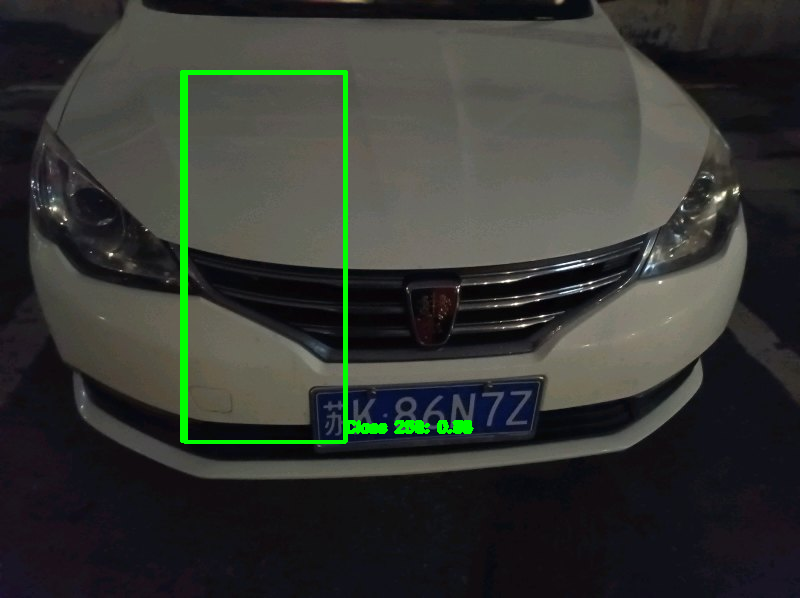

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# ... (previous code to load model) ...

# 读取并预处理图像（调整输入大小以匹配模型期望）
image_path = '/content/drive/MyDrive/yolo-ocr/license_plate/train/images/0_1714501261_32385160_119403376.jpg'  # 使用你的图像路径
image = cv2.imread(image_path)  # 使用你的图像路径

# 检查图像是否成功加载
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
    # Handle the case where the image loading fails, maybe exit the program or try a different path
else:
    # **修改：确定模型所需的正确输入大小**
    input_width = 640  # 根据模型要求替换
    input_height = 640  # 根据模型要求替换
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(input_width, input_height), mean=(0, 0, 0), swapRB=True, crop=False)

    # 设置网络输入
    net.setInput(blob)

    # 执行推理
    try:
        output = net.forward()
        print("Model Output:", output)

        # Process the model output to get detections (replace with actual processing logic)
        # Example: Assuming 'output' is a list of detections
        detections = np.array(output[0])

        # 设置检测阈值
        detection_threshold = 0.5 # 根据需要调整

        # 显示检测结果
        for i in range(detections.shape[0]): # Iterate over number of detections
            x1, y1, x2, y2, score, class_id = detections[i,:6] # Extract values for each detection
            # Check if the score is above the threshold
            if score > detection_threshold:
                # 绘制边界框
                cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                label = f"Class {int(class_id)}: {score:.2f}" # Use the score directly
                cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # 使用 Colab 支持的方式显示图像
        cv2_imshow(image)

    except cv2.error as e:
        print(f"Error during inference: {e}")
        print("This might indicate an issue with the model architecture. Please double-check the model.")

In [10]:
# 加载 ONNX 模型
net = cv2.dnn.readNetFromONNX('content/drive/MyDrive/yolo-ocr/yolov5/runs/train/exp3/weights/best.onnx')

# 打印模型的层信息
layer_names = net.getLayerNames()
print("Layer Names:", layer_names)

# 假设输入层是第一个层，您可以根据模型结构来调整
input_layer_name = layer_names[0]
print("Input Layer Name:", input_layer_name)

# 读取并预处理图像（调整输入大小以匹配模型期望）
image_path = '/content/drive/MyDrive/yolo-ocr/license_plate/train/images/0_1714501261_32385160_119403376.jpg'  # 使用你的图像路径
image = cv2.imread(image_path)  # 使用你的图像路径

# 检查图像是否成功加载
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
else:
    # **修改：确定模型所需的正确输入大小**
    input_width = 640  # 根据模型要求替换
    input_height = 640  # 根据模型要求替换
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(input_width, input_height), mean=(0, 0, 0), swapRB=True, crop=False)

    # 设置网络输入
    net.setInput(blob)

    # 执行推理
    try:
        output = net.forward()
        print("Model Output:", output)
    except cv2.error as e:
        print(f"Error during inference: {e}")
        print("This might indicate an issue with the model architecture. Please double-check the model.")

# 打印模型的层信息
layer_names = net.getLayerNames()
print("Layer Names:", layer_names)

# 假设输入层是第一个层，您可以根据模型结构来调整
input_layer_name = layer_names[0]
print("Input Layer Name:", input_layer_name)

# 读取并预处理图像（调整输入大小以匹配模型期望）
image_path = '/content/drive/MyDrive/yolo-ocr/license_plate/train/images/0_1714501261_32385160_119403376.jpg'  # 使用你的图像路径
image = cv2.imread(image_path)  # 使用你的图像路径

# 检查图像是否成功加载
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
else:
    # **修改：确定模型所需的正确输入大小**
    input_width = 640  # 根据模型要求替换
    input_height = 640  # 根据模型要求替换
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(input_width, input_height), mean=(0, 0, 0), swapRB=True, crop=False)

    # 设置网络输入
    net.setInput(blob)

    # 执行推理
    try:
        output = net.forward()
        print("Model Output:", output)
    except cv2.error as e:
        print(f"Error during inference: {e}")
        print("This might indicate an issue with the model architecture. Please double-check the model.")

# 打印模型的层信息
layer_names = net.getLayerNames()
print("Layer Names:", layer_names)

# 假设输入层是第一个层，您可以根据模型结构来调整
input_layer_name = layer_names[0]
print("Input Layer Name:", input_layer_name)

# 读取并预处理图像（调整输入大小以匹配模型期望）
image_path = '/content/drive/MyDrive/yolo-ocr/license_plate/train/images/0_1714501261_32385160_119403376.jpg'  # 使用你的图像路径
image = cv2.imread(image_path)  # 使用你的图像路径

# 检查图像是否成功加载
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
else:
    # **修改：确定模型所需的正确输入大小**
    input_width = 640  # 根据模型要求替换
    input_height = 640  # 根据模型要求替换
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(input_width, input_height), mean=(0, 0, 0), swapRB=True, crop=False)

    # 设置网络输入
    net.setInput(blob)

    # 执行推理
    try:
        output = net.forward()
        print("Model Output:", output)
    except cv2.error as e:
        print(f"Error during inference: {e}")
        print("This might indicate an issue with the model architecture. Please double-check the model.")

error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/onnx/onnx_importer.cpp:277: error: (-5:Bad argument) Can't read ONNX file: content/drive/MyDrive/yolo-ocr/yolov5/runs/train/exp3/weights/best.onnx in function 'ONNXImporter'


Model loaded successfully. Layer names available.


Model loaded successfully. Layer names available.
Model loaded successfully. Layer names available.


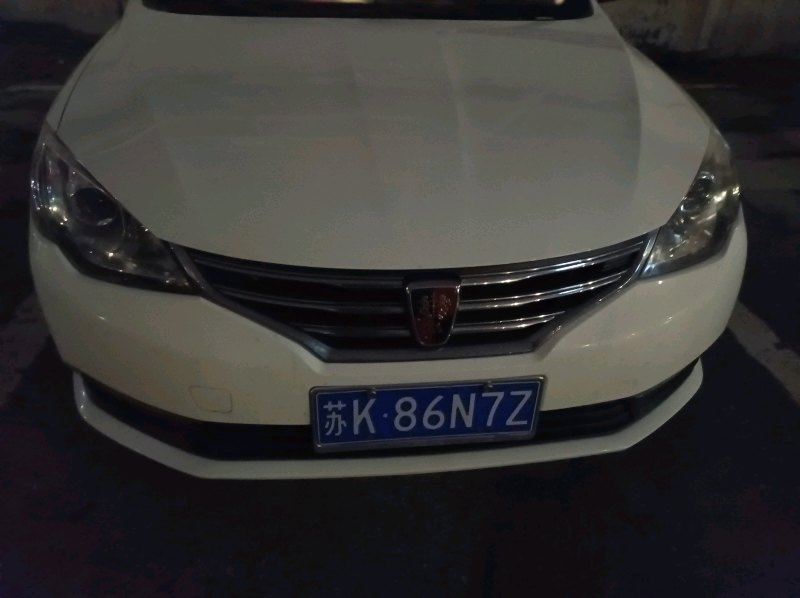

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# ... (Your previous code to load the model) ...
# 加载 ONNX 模型
net = cv2.dnn.readNetFromONNX('/content/drive/MyDrive/yolo-ocr/yolov5/runs/train/exp3/weights/best.onnx')

# Check if the model loaded correctly by attempting to get layer names
layer_names = net.getLayerNames()
if layer_names:
    print("Model loaded successfully. Layer names available.")
else:
    print("Model loading failed. Check the path and model integrity.")

# Check if the model loaded correctly by attempting to get layer names
layer_names = net.getLayerNames()
if layer_names:
    print("Model loaded successfully. Layer names available.")
else:
    print("Model loading failed. Check the path and model integrity.")

# 读取并预处理图像（调整输入大小以匹配模型期望）
image_path = '/content/drive/MyDrive/yolo-ocr/license_plate/train/images/0_1714501261_32385160_119403376.jpg'  # 使用你的图像路径
image = cv2.imread(image_path)  # 使用你的图像路径

# 检查图像是否成功加载
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
else:
    # **修改：确定模型所需的正确输入大小**
    input_width = 640  # 根据模型要求替换
    input_height = 640  # 根据模型要求替换
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(input_width, input_height), mean=(0, 0, 0), swapRB=True, crop=False)

    # 设置网络输入
    net.setInput(blob)

    # 执行推理
    try:
        output = net.forward()
        #print("Model Output:", output) # You might not need to print the raw output now

        # Process the model output to get detections
        # (Replace this with the actual logic based on your model's output format)
        detections = np.array(output[0])  # Example, adjust as needed

        # 设置检测阈值
        detection_threshold = 0.5  # Adjust as needed

        # 显示检测结果
        for i in range(detections.shape[0]):
            x1, y1, x2, y2, score, class_id = detections[i, :6]
            if score > detection_threshold:
                # 绘制边界框
                cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                label = f"Class {int(class_id)}: {score:.2f}"
                cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # 使用 Colab 支持的方式显示图像
        cv2_imshow(image)

    except cv2.error as e:
        print(f"Error during inference: {e}")
        print("This might indicate an issue with the model architecture or output format.")